In [282]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [283]:
# read the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [285]:
row,column = df.shape
print(row,column)


100000 9


In [286]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [287]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [288]:
df_columns = np.array(df.columns)
print(df_columns)

['gender' 'age' 'hypertension' 'heart_disease' 'smoking_history' 'bmi'
 'HbA1c_level' 'blood_glucose_level' 'diabetes']


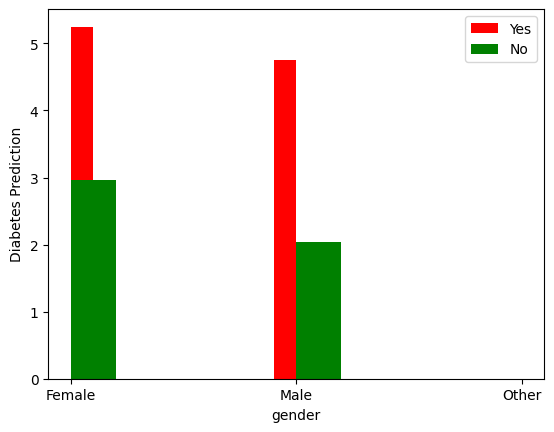

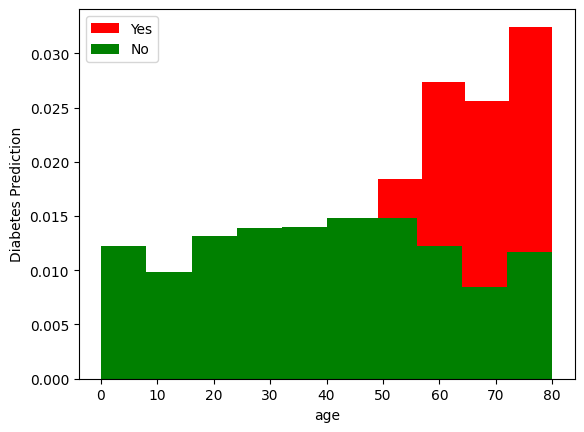

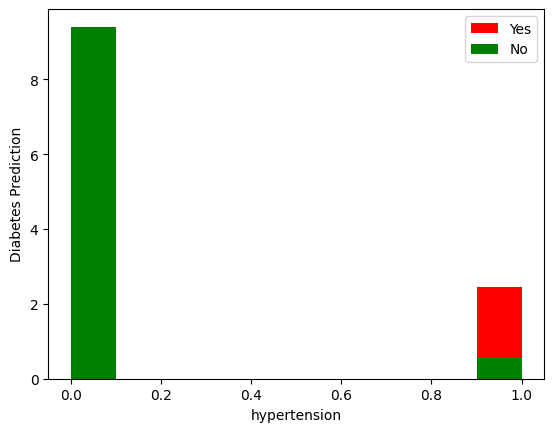

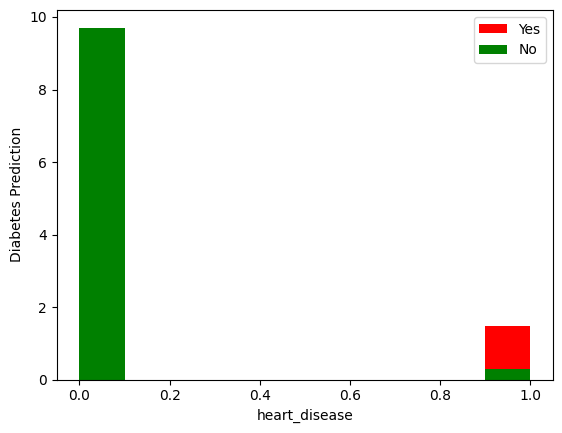

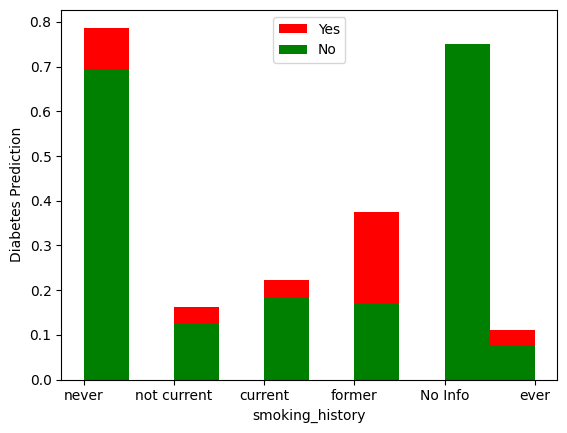

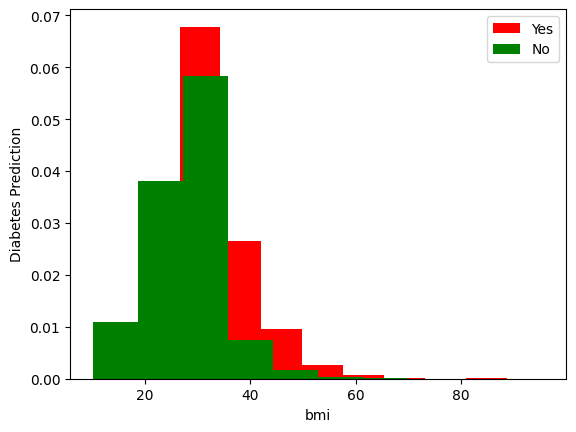

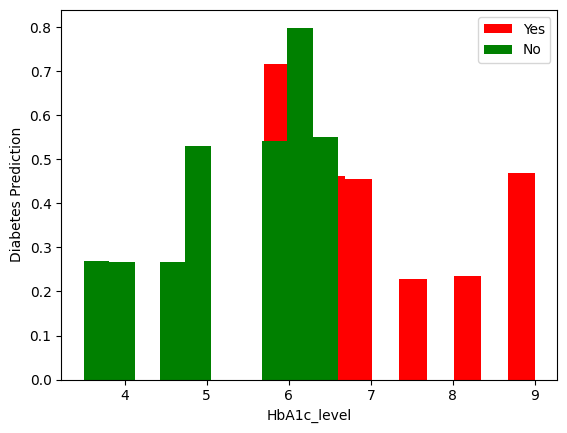

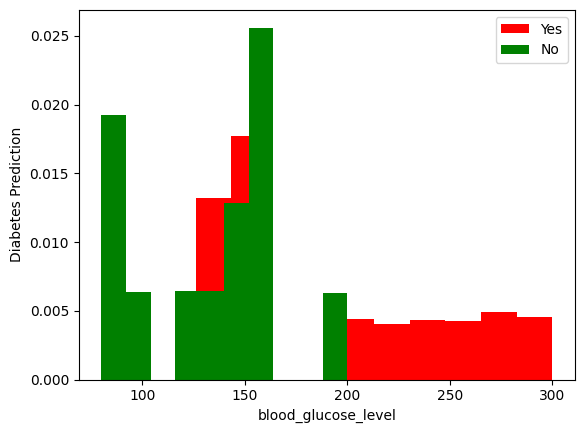

In [289]:
for label in df_columns[:-1]:
  plt.hist(df[df["diabetes"] == 1][label] ,color = "red",label = "Yes" , density = 0.7,)
  plt.hist(df[df["diabetes"] == 0][label] ,color = "green",label = "No" , density = 0.5)
  plt.xlabel(label)
  plt.ylabel("Diabetes Prediction")
  plt.legend()
  plt.show()



In [290]:
# drop the smoking column

df.drop(["smoking_history"],axis = 1,inplace=True)
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [291]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [292]:
# encoding the categorical variable
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])

In [293]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [294]:
print(X)

[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]


In [295]:
print(y)

[0 0 0 ... 0 0 0]


In [296]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


In [297]:
# Applying feature scaling

sc = StandardScaler()
X_train[:,[1,4,5,6]] = sc.fit_transform(X_train[:,[1,4,5,6]])
X_test[:,[1,4,5,6]] = sc.transform(X_test[:,[1,4,5,6]])

In [298]:
print(X_train)

[[ 0.00000000e+00 -1.77286554e+00  0.00000000e+00 ... -1.63680432e+00
   6.28047693e-01  5.17744967e-01]
 [ 0.00000000e+00  5.80603115e-01  0.00000000e+00 ... -4.13134567e-01
   4.41305544e-01 -1.95692520e-01]
 [ 0.00000000e+00 -7.95954023e-01  0.00000000e+00 ... -8.37059469e-01
  -9.59260571e-01 -1.95692520e-01]
 ...
 [ 1.00000000e+00  1.06905887e+00  0.00000000e+00 ...  2.08832301e+00
   3.24243778e+00  1.73326870e-01]
 [ 0.00000000e+00 -2.18688126e-01  0.00000000e+00 ...  4.27198839e-01
   2.54563396e-01 -1.17974423e+00]
 [ 0.00000000e+00  4.47387908e-01  0.00000000e+00 ... -2.73918249e-03
  -9.59260571e-01  4.93143675e-01]]


In [299]:
# Logistic Regression

log_classifier = LogisticRegression()
log_classifier.fit(X_train,y_train)


LogisticRegression()

In [300]:
y_log_pred = log_classifier.predict(X_test)


In [301]:
print("The confusion matrix and accuracy for Logistic Regression Classifier is:")
print(confusion_matrix(y_test,y_log_pred))
print(accuracy_score(y_test,y_log_pred))

The confusion matrix and accuracy for Logistic Regression Classifier is:
[[18112   185]
 [  615  1088]]
0.96


In [302]:
# K Nearest Neighbors Classifier (Euclidean distance)

knn_classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski')
knn_classifier.fit(X_train,y_train)



KNeighborsClassifier()

In [303]:
y_knn_pred = knn_classifier.predict(X_test)

In [304]:
print("The confusion matrix and accuracy for K Nearest Neighbors Classifier is:")
print(confusion_matrix(y_test,y_knn_pred))
print(accuracy_score(y_test,y_knn_pred))

The confusion matrix and accuracy for K Nearest Neighbors Classifier is:
[[18155   142]
 [  573  1130]]
0.96425


In [305]:
# Kernel SVM Classifier

svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train,y_train)



SVC()

In [306]:
y_svc_pred = svc_classifier.predict(X_test)

In [307]:
print("The confusion matrix and accuracy for Support Vector Classifier is:")
print(confusion_matrix(y_test,y_svc_pred))
print(accuracy_score(y_test,y_svc_pred))

The confusion matrix and accuracy for Support Vector Classifier is:
[[18287    10]
 [  638  1065]]
0.9676


In [308]:
# Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(criterion="entropy",random_state = 0)
dt_classifier.fit(X_train,y_train)





DecisionTreeClassifier(criterion='entropy', random_state=0)

In [309]:
y_dt_pred = dt_classifier.predict(X_test)

In [310]:
print("The confusion matrix and accuracy for Decision Tree Classifier is:")
print(confusion_matrix(y_test,y_dt_pred))
print(accuracy_score(y_test,y_dt_pred))

The confusion matrix and accuracy for Decision Tree Classifier is:
[[17855   442]
 [  446  1257]]
0.9556


In [311]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=10,random_state = 0)
rf_classifier.fit(X_train,y_train)




RandomForestClassifier(n_estimators=10, random_state=0)

In [312]:
y_rf_pred = rf_classifier.predict(X_test)

In [313]:
print("The confusion matrix and accuracy for Random Forest Classifier is:")
print(confusion_matrix(y_test,y_rf_pred))
print(accuracy_score(y_test,y_rf_pred))

The confusion matrix and accuracy for Random Forest Classifier is:
[[18194   103]
 [  522  1181]]
0.96875


Therefore Random Forest Classifier has the highest accuracy in predicting if a person has diabetes or not
